In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and understand

In [62]:
data = pd.read_excel('D:\power bi\datasets\Superstore.xls')

In [63]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [64]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [65]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [66]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

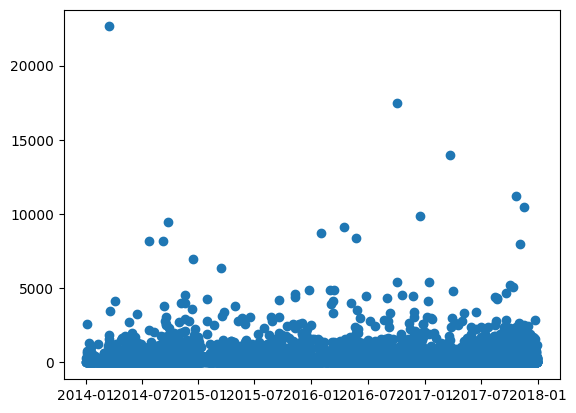

In [67]:
plt.scatter(y=data['Sales'],x=data['Order Date'])

In [68]:
data.drop(data[data['Sales']>5000].index,inplace=True)

# Sales distribution

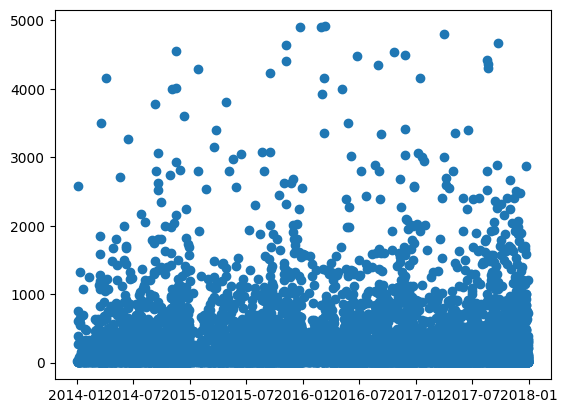

In [69]:
plt.scatter(y=data['Sales'],x=data['Order Date'])

# Sales by Category

<Axes: title={'center': 'Sales by Category'}, xlabel='Sales', ylabel='Category'>

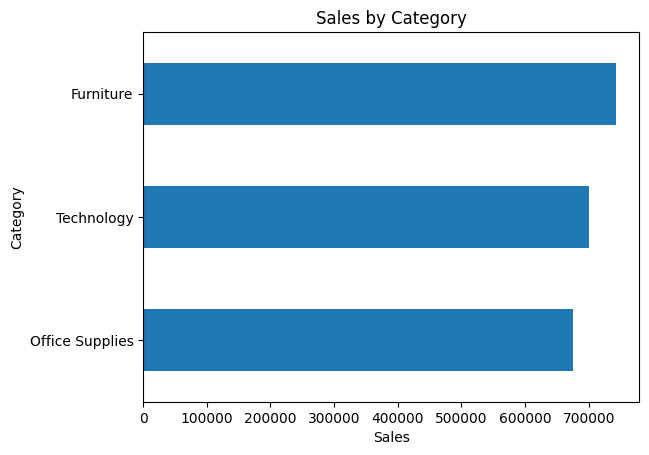

In [70]:
data.groupby('Category')['Sales'].sum().sort_values().plot(kind='barh',title='Sales by Category',xlabel='Sales')

# Profit by Sub-Category

<Axes: title={'center': 'Profit by Sub-Category'}, xlabel='Profit', ylabel='Sub-Category'>

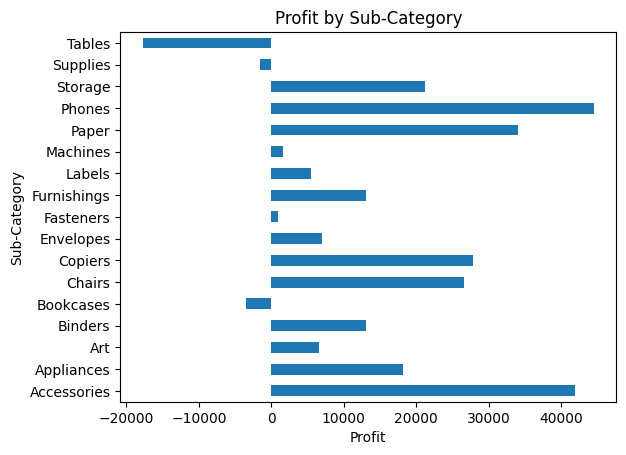

In [71]:
data.groupby('Sub-Category')['Profit'].sum().plot(kind='barh',title='Profit by Sub-Category',xlabel='Profit')

# Profit by Sub-Category

<Axes: title={'center': 'Profit by Sub-Category'}, xlabel='Profit', ylabel='Sub-Category'>

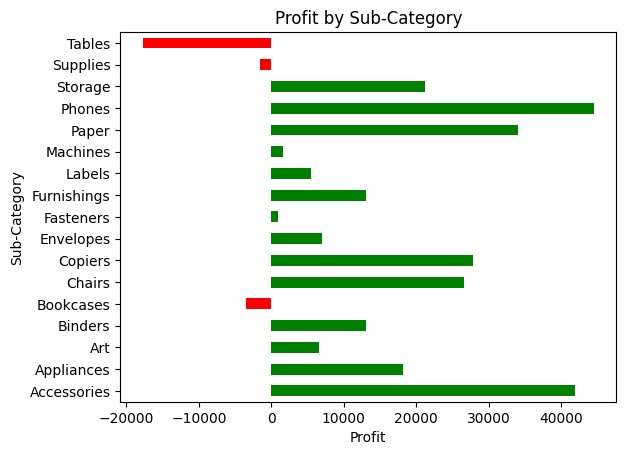

In [72]:
data.groupby('Sub-Category')['Profit'].sum().plot(kind='barh', title='Profit by Sub-Category', xlabel='Profit',
                           color=['red' if profit < 0 else 'green' for profit in data.groupby('Sub-Category')['Profit'].sum()])

# Sales and Profit by Region

<Axes: xlabel='Region', ylabel='Sales'>

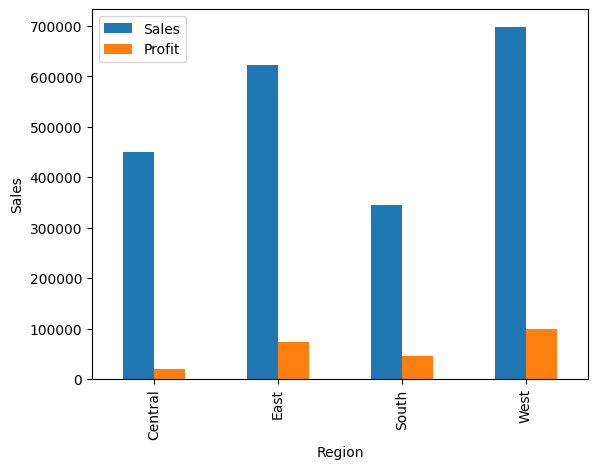

In [73]:
data.groupby('Region')[['Sales','Profit']].sum().plot(kind='bar',ylabel='Sales')

In [74]:
data.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(5)


Customer Name
Keith Dawkins      3038.6254
Nathan Mautz       2751.6849
Harry Marie        2437.9836
Brian Moss         2199.2781
Helen Wasserman    2164.1611
Name: Profit, dtype: float64

In [75]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [76]:
data['Year Month'] = data['Order Date'].dt.month_name()

In [77]:
data['Year Month'].head()

0    November
1    November
2        June
3     October
4     October
Name: Year Month, dtype: object

In [78]:
data['Year Month'].sort_index()

0       November
1       November
2           June
3        October
4        October
          ...   
9989     January
9990    February
9991    February
9992    February
9993         May
Name: Year Month, Length: 9975, dtype: object

In [79]:
sales_per_month = data.groupby('Year Month')['Sales'].sum()

In [80]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [81]:
sales_in_month = {}
for month in months:
    sales_in_month[month] = sales_per_month[month]
sales_in_month

{'January': 89480.8756,
 'February': 51001.3014,
 'March': 162012.0988,
 'April': 128662.1986,
 'May': 146628.8357,
 'June': 152718.6793,
 'July': 139050.44700000001,
 'August': 159044.063,
 'September': 290040.0437,
 'October': 155939.2367,
 'November': 333961.121,
 'December': 308400.8035}

# Sales by Month

Text(0.5, 1.0, 'Sales per Month')

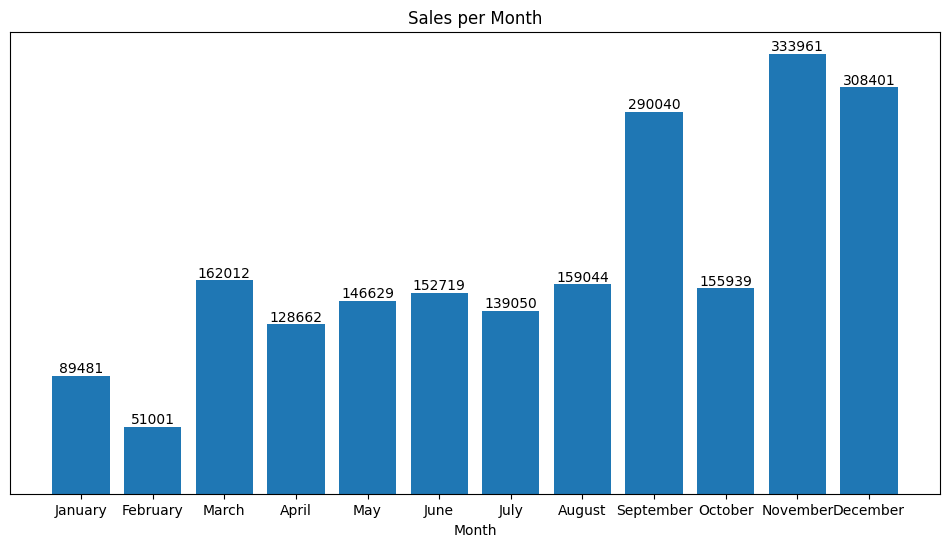

In [82]:
fig = plt.figure(figsize=(12, 6))
plt.bar(sales_in_month.keys(),sales_in_month.values())
for k,v in sales_in_month.items():
    plt.text(k,v,str(round(v)),ha='center', va='bottom')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel("Month")
plt.title("Sales per Month")

In [113]:
shipMode = data['Ship Mode'].value_counts()

# Ship Mod

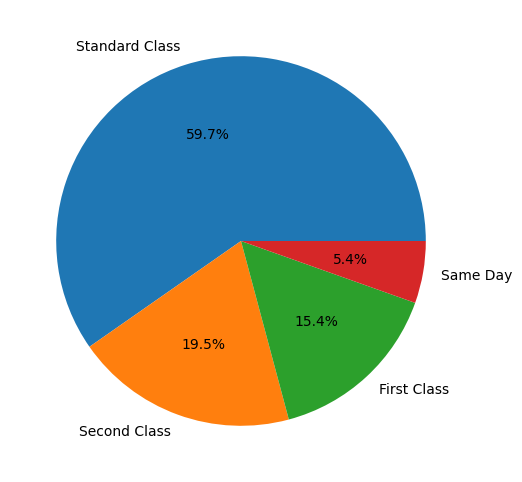

In [119]:
fig = plt.figure(figsize=(10, 6))

plt.pie(shipMode,autopct='%1.1f%%',labels=shipMode.index);


# the most 10 product make sales

<Axes: ylabel='Product Name'>

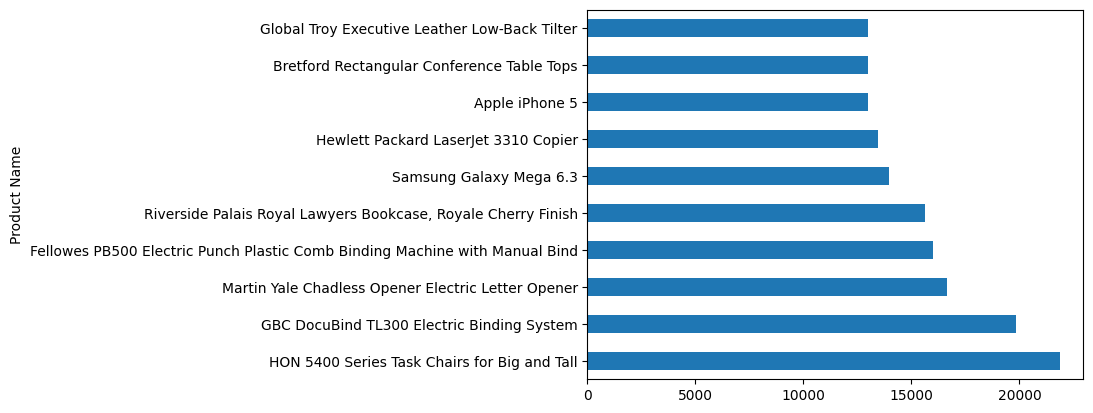

In [130]:
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

# the most 10 product Sold

<Axes: ylabel='Product Name'>

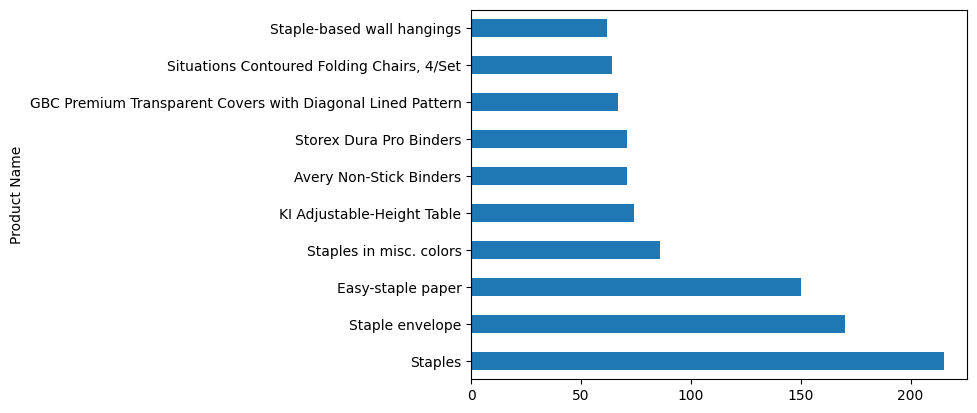

In [132]:
data.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

In [145]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Year Month'],
      dtype='object')

In [146]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Year Month'],
      dtype='object')

# Sales in City

In [144]:
data.groupby('City')['Sales'].sum().sort_values(ascending=False).head()

City
New York City    232968.273
Los Angeles      175851.341
Seattle          105540.782
San Francisco    104481.442
Philadelphia     100677.037
Name: Sales, dtype: float64

# Sales in Stats

In [147]:
data.groupby('State')['Sales'].sum().sort_values(ascending=False).head()

State
California      444416.0215
New York        287476.3830
Texas           162028.0938
Washington      124641.3100
Pennsylvania    108111.9380
Name: Sales, dtype: float64